# Read dataset

In [1]:
import os

import numpy as np
import pandas as pd
import re

In [2]:
data_folder = "../data"
if not os.path.exists(data_folder):
    os.makedirs(data_folder)

path = os.path.join(data_folder, "all_data.parquet")

In [3]:
read_data = pd.read_parquet(path)
read_data['category'] = read_data['category_id'].astype(str) + '_' + read_data['category_name']

In [4]:
read_data

,name,price,category_id,category_name,category
0,Sena 30K HD Bluetooth pasikalbėjimo įranga 2ko...,40279,3,Laisvų rankų įranga,3_Laisvų rankų įranga
1,Cardo Scala Rider SHO-1 Power Double Pack Shoe...,23585,3,Laisvų rankų įranga,3_Laisvų rankų įranga
2,Sena SMH10 BT pasikalbėjimo įranga 1kompl.,16528,3,Laisvų rankų įranga,3_Laisvų rankų įranga
3,"Laisvų rankų įranga Tellur, Bluetooth",1524,3,Laisvų rankų įranga,3_Laisvų rankų įranga
4,Sena 50C Universalus tvirtinimo komplektas su ...,8166,3,Laisvų rankų įranga,3_Laisvų rankų įranga
...,...,...,...,...,...
437680,Streets of Rogue Steam Key EUROPE,169,48,PC žaidimai,48_PC žaidimai
437681,Jurassic World Evolution 2: Dominion Malta Exp...,535,48,PC žaidimai,48_PC žaidimai
437682,Disney Cars Pendrive 4GB,1465,48,PC žaidimai,48_PC žaidimai
437683,Yalla Ludo - 3700000 Gold Key GLOBAL,2169,48,PC žaidimai,48_PC žaidimai


# Label encoder

In [5]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [6]:
label_encoder.fit(read_data['category'])

LabelEncoder()

In [7]:
label_encoder.classes_

array(['1002_Mazda deflektoriai', '1003_Mercedes Benz deflektoriai',
       '1004_Mini deflektoriai', ..., '999_Lexus deflektoriai',
       '99_UPS - Nepertraukiamo maitinimo šaltiniai',
       '9_Mobiliųjų telefonų pakrovėjai'], dtype=object)

In [8]:
read_data['target'] = label_encoder.transform(read_data['category'])

In [9]:
label_encoder.transform(['99_UPS - Nepertraukiamo maitinimo šaltiniai'])

array([2855])

# Split dataset

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_data, test_data = train_test_split(read_data, test_size=0.1, random_state=42)

In [12]:
train_data

,name,price,category_id,category_name,category,target
174035,Kelio įtvaras,17990,1404,Kelių įtvarai,1404_Kelių įtvarai,339
260647,Rieker vyriški bateliai (Ruda spalva),10259,2673,Vyriški klasikiniai batai,2673_Vyriški klasikiniai batai,1365
389259,INOAR CicatriFios Mask - plauko struktūrą atku...,2880,1550,Plaukų kaukės,1550_Plaukų kaukės,466
106675,Hankook W320A 295/35R23 108W,27300,3484,Žieminės padangos R23,3484_Žieminės padangos R23,2054
330919,MOTUL 5100 10W50 4T 1L,1250,211,Keturtakčių variklių alyva,211_Keturtakčių variklių alyva,970
...,...,...,...,...,...,...
259178,New Balance 800 GS - Dydis 30 (PT800TFT Žiemin...,6900,2675,Vyriški žieminiai batai,2675_Vyriški žieminiai batai,1367
365838,BLOW 78-556 BLACKBOX DVR video recorder F270 B...,2049,817,Vaizdo registratoriai,817_Vaizdo registratoriai,2672
131932,Gallet Sandwich maker Trelon GALCRO615 750 W N...,3199,1253,Sumuštinių keptuvės,1253_Sumuštinių keptuvės,188
146867,Vaikiškas paspiriamas traktoriukas,6599,1635,Paspiriamos mašinėlės,1635_Paspiriamos mašinėlės,546


In [13]:
test_data

,name,price,category_id,category_name,category,target
148322,"Čiuožynė Pedro, Oultiner, raudona",272,1633,Čiuožynės,1633_Čiuožynės,544
208240,Master F12 elektrinis bėgimo takelis,61999,1881,Bėgimo takeliai,1881_Bėgimo takeliai,777
203049,Dviračio kompiuteris SIGMA ROX 4.0 GPS Black H...,14845,1830,Dviračių kompiuteriai,1830_Dviračių kompiuteriai,734
126609,"Automobilio uždangalas Nava Group Classic, pilka",3690,904,Automobilių uždangalai,904_Automobilių uždangalai,2759
108877,Yokohama BluEarth Winter V906 205/55 R17 95 V,12715,859,Žieminės padangos R17,859_Žieminės padangos R17,2713
...,...,...,...,...,...,...
431889,"Kavos pupelės Huracan Coffee MASSAPA ESPRESSO,...",4799,3105,Kavos pupelės,3105_Kavos pupelės,1732
433214,"Kava LAVAZZA Qualita Rossa, malta, 250 g",487,3102,Malta kava,3102_Malta kava,1729
343428,Suvirinimo aparatas KEMPPI Minarc 150,69841,333,Suvirinimo aparatai,333_Suvirinimo aparatai,1933
303176,"Guminukai Lucky John Tioga 2.9"" 7.4cm Full Syn...",41,3258,Guminukai,3258_Guminukai,1878


# Text cleaner

In [14]:
def clean_text(text):
    text = text.lower()

    replacements = {
        'ą': 'a', 'č': 'c', 'ę': 'e', 'ė': 'e', 'į': 'i', 'š': 's', 'ų': 'u', 'ū': 'u', 'ž': 'z',
    }
    for lt_char, replacement in replacements.items():
        text = text.replace(lt_char, replacement)

    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')

    # Dropping quatattions
    # text = text.replace('"', '')
    # text = text.replace("'", '')
    # text = text.replace("`", '')
    text = text.replace("-", '')
    text = text.replace(",", '')
    text = text.replace("„", '')
    text = text.replace("“", '')

    # remove some phrases
    text = re.sub(r'atgauk \d+%', '', text)
    text = re.sub(r'preke po grazinimo', '', text)

    # Converting any number to # symbol
    # text = re.sub(r'\d+', 'number', text)

    # Cleaning multiple spaces
    text = ' '.join(text.split())

    return text

# Vektorizer

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
stop_words = ['ir', 'nuolaida', 'ispardavimas', 'preke po grazinimo', 'kaina', 'preke', 'po', 'grazinimo', 'atgauk']

In [17]:
# vectorizer = TfidfVectorizer(sublinear_tf=True, max_df=0.3, min_df=3, stop_words=stop_words, ngram_range=(1, 3), lowercase=True, strip_accents='ascii')
vectorizer = TfidfVectorizer(stop_words=stop_words, max_df=0.3, min_df=2,  ngram_range=(1, 3), preprocessor=clean_text, analyzer='word', dtype=np.float32, max_features=100000)

In [18]:
vectorizer.fit(train_data['name'])

TfidfVectorizer(dtype=<class 'numpy.float32'>, max_df=0.3, max_features=100000,
                min_df=2, ngram_range=(1, 3),
                preprocessor=<function clean_text at 0x300806ca0>,
                stop_words=['ir', 'nuolaida', 'ispardavimas',
                            'preke po grazinimo', 'kaina', 'preke', 'po',
                            'grazinimo', 'atgauk'])

In [19]:
len(vectorizer.vocabulary_)

100000

In [21]:
vectorizer.get_feature_names_out()[:10]

array(['00', '00 3000', '00 50', '00 50 00', '00 5000', '00 5000 series',
       '00 559', '00 balta', '00 chromo', '00 et30'], dtype=object)

In [22]:
vectorizer.transform(['magnetinė šaškių ir šachmatų lenta qx#'])

<1x100000 sparse matrix of type '<class 'numpy.float32'>'
	with 5 stored elements in Compressed Sparse Row format>

In [23]:
vectorizer.vocabulary_.get('12 ani')

# Prepare training adn testing data

In [24]:
X_train = vectorizer.transform(train_data['name'])
X_test = vectorizer.transform(test_data['name'])

In [25]:
y_train = label_encoder.transform(train_data['category'])
y_test = label_encoder.transform(test_data['category'])

# Hide warnings

In [26]:
import warnings
from sklearn.exceptions import ConvergenceWarning

In [27]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Train

In [28]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss

In [29]:
max_iter = 5
log_losses = []
scores = []
validation_scores = []

In [30]:
lr = LogisticRegression(max_iter=1, solver='saga', warm_start=True)

In [31]:
for i in range(max_iter):
    lr.fit(X_train, y_train)

    # Calculate log loss for progress monitoring
    y_prob = lr.predict_proba(X_train)
    loss = log_loss(y_train, y_prob)
    log_losses.append(loss)

    # Track training accuracy
    acc = lr.score(X_train, y_train)
    scores.append(acc)

    # Track validation accuracy
    validation_acc = lr.score(X_test, y_test)
    validation_scores.append(validation_acc)

    # Print progress for transparency
    print(f"Iteration {i + 1}/{max_iter}: Log Loss = {loss:.4f}, Accuracy = {acc:.4f}, Validation accuracy = {validation_acc:.4f}")

Iteration 1/5: Log Loss = 1.3593, Accuracy = 0.8117, Validation accuracy = 0.7694
Iteration 2/5: Log Loss = 1.1628, Accuracy = 0.8487, Validation accuracy = 0.7961
Iteration 3/5: Log Loss = 1.0971, Accuracy = 0.8593, Validation accuracy = 0.8037
Iteration 4/5: Log Loss = 1.0782, Accuracy = 0.8619, Validation accuracy = 0.8035
Iteration 5/5: Log Loss = 1.0683, Accuracy = 0.8630, Validation accuracy = 0.8058


# Plot training result

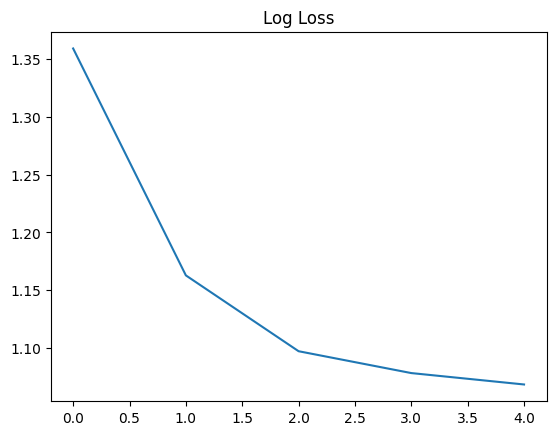

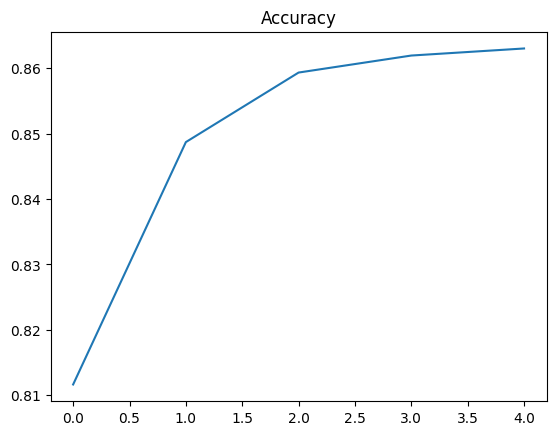

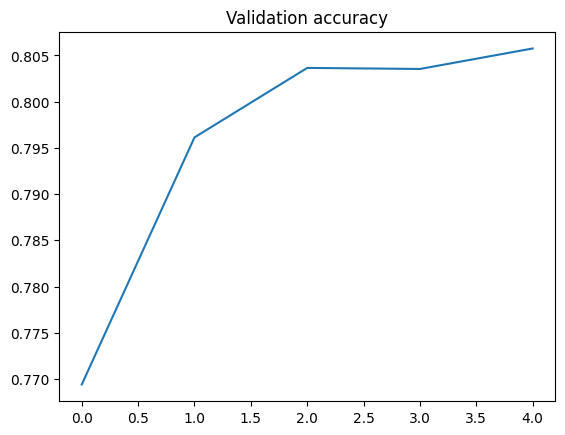

In [32]:
plt.plot(log_losses)
plt.title('Log Loss')
plt.show()

plt.plot(scores)
plt.title('Accuracy')
plt.show()

plt.plot(validation_scores)
plt.title('Validation accuracy')
plt.show()

# Classification report

In [34]:
from sklearn.metrics import classification_report

In [35]:
pred = lr.predict(X_test)

In [36]:
classes_present = np.unique(np.concatenate([y_test, pred]))

In [37]:
classes_present

array([   0,    1,    2, ..., 2854, 2855, 2856])

In [38]:
reduced_target_names = [label_encoder.classes_[i] for i in classes_present]

In [39]:
classification_report_report = classification_report(y_test, pred, target_names=reduced_target_names, zero_division=0)

In [41]:
print(classification_report_report)

                                                            precision    recall  f1-score   support

                                   1002_Mazda deflektoriai       1.00      0.67      0.80         3
                           1003_Mercedes Benz deflektoriai       0.46      0.62      0.53        29
                                    1004_Mini deflektoriai       0.00      0.00      0.00         1
                              1005_Mitsubishi deflektoriai       0.00      0.00      0.00         3
                                  1006_Nissan deflektoriai       1.00      0.67      0.80         3
                                    1007_Opel deflektoriai       1.00      1.00      1.00         9
                                 1008_Peugeot deflektoriai       0.71      0.83      0.77         6
                               100_Atviro kodo elektronika       1.00      0.50      0.67         2
                                 1010_Porsche deflektoriai       0.00      0.00      0.00         1

# Confusion matrice

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [43]:
confusion_matrix_report = confusion_matrix(y_test, pred)

In [44]:
print(confusion_matrix_report)

[[ 2  1  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  1  0 ...  1  0  0]
 [ 0  0  0 ...  0 16  0]
 [ 0  0  0 ...  0  0  0]]


# Show coefficient for particular class

In [80]:
def show_coefficients_for(class_name):
    print(f"Coefficients for class '{class_name}':")
    print('----------------------------')
    class_index = label_encoder.transform([class_name])[0]
    class_coefficients = lr.coef_[class_index]
    feature_coefficients = dict(zip(vectorizer.get_feature_names_out(), class_coefficients))
    sorted_features = sorted(feature_coefficients.items(), key=lambda x: x[1], reverse=True)
    for feature, coefficient in sorted_features[:20]:
        print(f"{feature}: {coefficient:.4f}")


In [82]:
show_coefficients_for('3533_Elektros rozetės ir jungikliai')

Coefficients for class '3533_Elektros rozetės ir jungikliai':
----------------------------
karutis: 16.9185
sodo: 4.7595
vezimelis: 4.2500
sodo vezimelis: 4.0292
awtools: 3.9323
tarmo: 3.6363
vienaratis: 3.2432
vienaratis karutis: 3.2432
85l: 2.7342
load go: 2.7295
load: 2.5785
dviratis karutis: 2.5021
sulankstomas: 2.4884
plienas: 2.2043
truper: 2.1519
20mm: 2.0922
standartinis: 2.0776
statybine: 2.0735
vaikiskas karutis: 2.0245
karutis sodo: 1.9696


# Some tests

In [95]:
y_test
# 2855 99_UPS - Nepertraukiamo maitinimo šaltiniai

array([ 846, 1259,  382, ...,  617, 2002, 2535])

In [131]:
label_encoder.transform(['995_Kia deflektoriai'])

array([2851])

In [132]:
unique, counts = np.unique(y_test, return_counts=True)
print(dict(zip(unique, counts)))  # Output: {1: 1, 2: 2, 3: 3, 4: 1}

{np.int64(0): np.int64(3), np.int64(1): np.int64(27), np.int64(2): np.int64(1), np.int64(3): np.int64(2), np.int64(4): np.int64(4), np.int64(5): np.int64(10), np.int64(6): np.int64(10), np.int64(7): np.int64(4), np.int64(9): np.int64(6), np.int64(12): np.int64(2), np.int64(13): np.int64(2), np.int64(15): np.int64(3), np.int64(16): np.int64(1), np.int64(17): np.int64(1), np.int64(18): np.int64(18), np.int64(19): np.int64(8), np.int64(20): np.int64(6), np.int64(21): np.int64(3), np.int64(22): np.int64(3), np.int64(23): np.int64(15), np.int64(24): np.int64(10), np.int64(25): np.int64(3), np.int64(26): np.int64(27), np.int64(27): np.int64(1), np.int64(28): np.int64(34), np.int64(29): np.int64(5), np.int64(30): np.int64(5), np.int64(31): np.int64(36), np.int64(32): np.int64(34), np.int64(33): np.int64(10), np.int64(34): np.int64(11), np.int64(35): np.int64(1), np.int64(36): np.int64(1), np.int64(37): np.int64(7), np.int64(38): np.int64(5), np.int64(39): np.int64(22), np.int64(40): np.int64(

In [137]:
y_true = ["cat", "ant", "cat", "cat", "ant", "bird"]
y_pred = ["ant", "ant", "cat", "cat", "ant", "cat"]
confusion_matrix(y_true, y_pred, labels=["ant", "bird", "cat"])

array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

In [146]:
labels = ["cat", "bird"]
cm = confusion_matrix(y_true, y_pred, labels=labels)

In [147]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

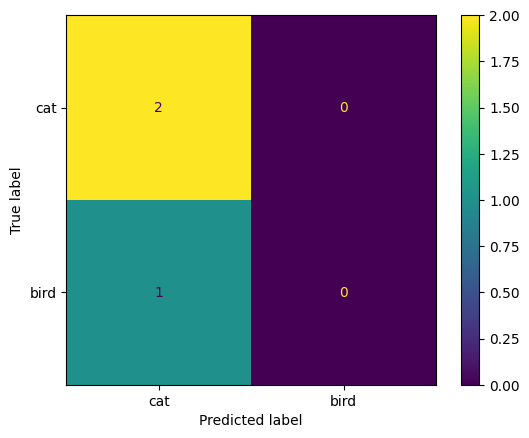

In [148]:
disp.plot()